# Social Networks Ads

## Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Loading dataset

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## EDA - Exploratory Data Analysis

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Plotting countplot at 'Purchased' with respect to 'Gender'

<Axes: xlabel='Purchased', ylabel='count'>

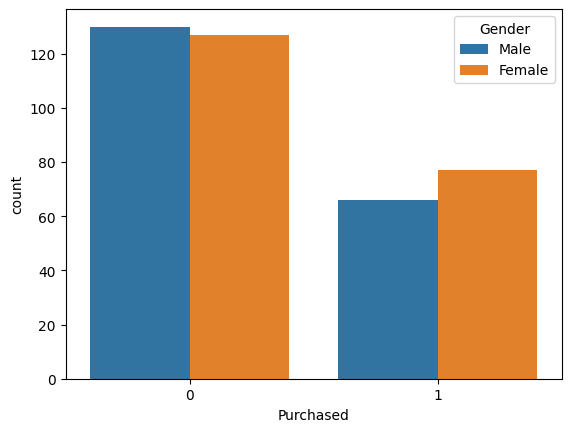

In [9]:
sb.countplot(x = df.Purchased, hue = df.Gender, data = df)

## Plotting 'Age'

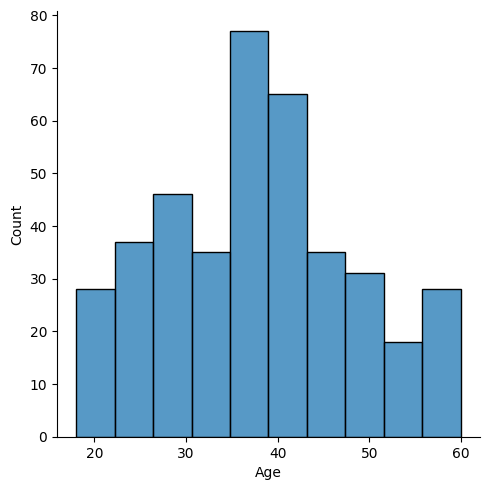

In [26]:
sb.displot(df.Age)

## Plotting 'EstimatedSalary'

<Axes: ylabel='Density'>

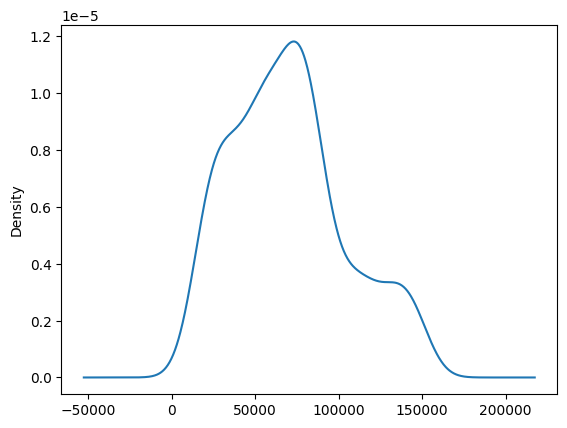

In [11]:
df.EstimatedSalary.plot(kind = 'kde')

## Feature Selection

In [12]:
#independet variables
x = df[['Age','EstimatedSalary']]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [13]:
#dependent variable
y = df.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Feature Scaling

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

## Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
x_train

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [17]:
x_test

array([[-0.64807267,  0.53080315],
       [ 0.07535729, -0.59737588],
       [-0.19592895,  0.16490725],
       [-0.64807267,  0.28687255],
       [-0.19592895, -0.59737588],
       [-0.9193589 , -1.51211563],
       [-0.55764392, -1.66457226],
       [-0.1055002 ,  2.26880869],
       [-1.7332176 , -0.04853203],
       [ 0.88921599, -0.81081516],
       [-0.64807267, -0.6278672 ],
       [-0.82893016, -0.44491925],
       [-0.01507146, -0.44491925],
       [ 0.16578603,  0.2258899 ],
       [-1.55236011,  0.50031183],
       [-0.46721518,  1.44554291],
       [-0.01507146,  0.2258899 ],
       [-1.64278886,  0.4698205 ],
       [ 1.61264594,  1.84193014],
       [-0.19592895, -1.45113298],
       [-0.19592895, -0.68884985],
       [ 0.88921599,  2.26880869],
       [ 0.34664352, -0.56688455],
       [ 0.88921599,  1.07964701],
       [-1.28107388, -1.26818503],
       [ 1.07007347,  2.17733471],
       [-0.82893016,  0.53080315],
       [-0.73850141,  0.31736388],
       [-0.01507146,

## modeling

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Prediction

In [21]:
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

## Checking the performance of the matrix

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Confusion Matrix

In [23]:
confusion_matrix(y_test,prediction)

array([[75,  4],
       [ 9, 32]])

### Classification Report

In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120



### Accuracy Score

In [25]:
print(accuracy_score(y_test,prediction))

0.8916666666666667
